## Load dataset

In [1]:
from urso import Urso 
from config import Config
import utils
import cv2

# Dataset location
dataset_path = '../datasets/soyuz_easy'

# Load dataset
dataset = Urso()
config = Config()
dataset.load_dataset(dataset_path, config, "train")

Loading poses


## Load and show image and pose

Using TensorFlow backend.


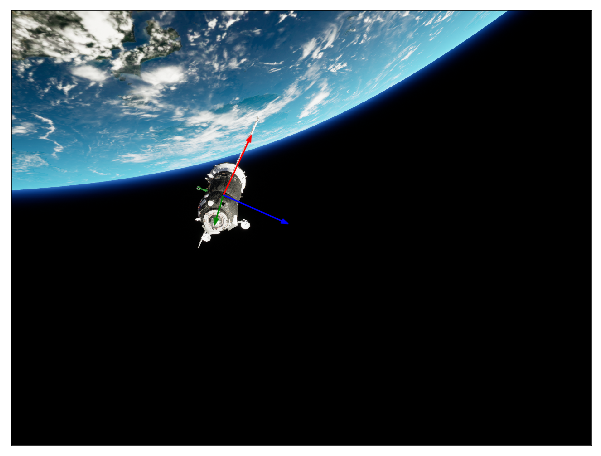

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import net

# Load image and gt pose
image_id = random.choice(dataset.image_ids)
image_original = dataset.load_image(image_id)
loc_gt = dataset.load_location(image_id)
q_gt = dataset.load_quaternion(image_id)

# Retrieve K (calibration matrix)
K = dataset.camera.K

# 3. Visualize original image + gt
fig, ax_1 = plt.subplots(1,1,figsize=(12, 8))
ax_1.imshow(image_original)
ax_1.set_xticks([])
ax_1.set_yticks([])
axis_length = 200
utils.visualize_axes(ax_1, q_gt, loc_gt, K, axis_length)
plt.show()


## Data augmentation visualization

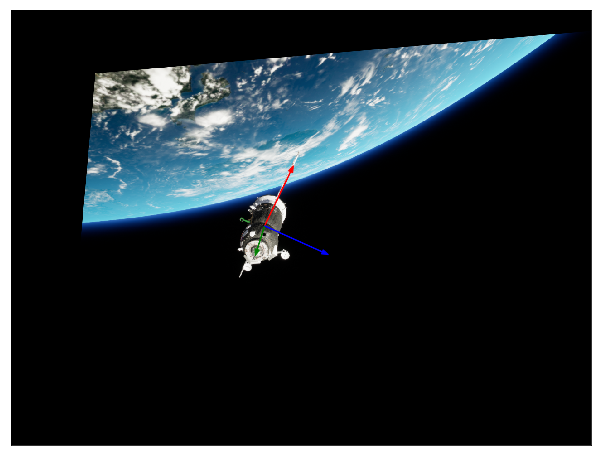

In [6]:
import cv2
import se3lib

magnitude = 20 # deg
image_warped, loc_new, q_new = utils.rotate_cam(image_original, loc_gt, q_gt, K,magnitude)
# The following does instead in-plane rotation
#image_warped, loc_new, q_new = utils.rotate_image(image_original, loc_gt, q_gt, dataset.camera.K)

fig, (ax_2) = plt.subplots(1,1,figsize=(12, 8))
ax_2.imshow(image_warped)
ax_2.set_xticks([])
ax_2.set_yticks([])

utils.visualize_axes(ax_2, q_new, loc_new, K, 200)